In [25]:
import pandas as pd
import numpy as np
import numpy.linalg as la
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Análisis de Componentes Principales (PCA)

In [6]:
cols_headers = "Sexo Estatura Peso Pie Brazo Espalda Craneo Rod_Tob".split()
df = pd.read_csv('../datos/Datos1F2.txt', names=cols_headers)
df.tail()

,Sexo,Estatura,Peso,Pie,Brazo,Espalda,Craneo,Rod_Tob
22,0,155.0,53.0,36.0,67.0,43.0,56.0,38.0
23,1,189.0,87.0,45.0,82.0,53.0,61.0,52.0
24,0,170.0,70.0,38.0,73.0,45.0,56.0,43.0
25,1,170.0,67.0,40.0,77.0,46.5,58.0,44.0
26,0,168.0,56.0,37.5,70.5,48.0,60.0,40.0


¿Se puede tener una noción de la geometría de los puntos de la muestra?

Una forma es proyectar los datos sobre el plano de las dos primeras componentes principales

Primero, grafiquemos las clases en las dos primeras variables:

In [18]:
df_0 = df[df.Sexo==0]
df_1 = df[df.Sexo==1]

In [19]:
df_0x = df_0["Estatura"]
df_0y = df_0["Peso"]
df_1x = df_1["Estatura"]
df_1y = df_1["Peso"]

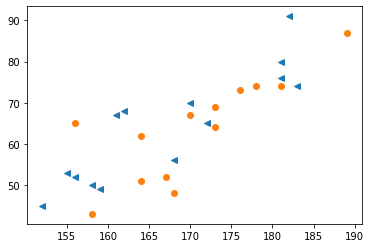

In [23]:
plt.plot(df_0x, df_0y, '<', df_1x, df_1y, 'o')

Vamos a hacer el plot sobre las componentes principales

In [37]:
X = df.drop('Sexo', axis=1).values
X.mean(axis=0)

array([168.77777778,  63.88888889,  38.98148148,  73.46296296,
        45.85185185,  57.24074074,  43.07407407])

In [38]:
X.std(axis=0)

array([10.00493705, 12.56194528,  2.8103034 ,  4.86469885,  3.94596563,
        1.80724043,  3.09031853])

In [47]:
X_stand = StandardScaler().fit_transform(X)
print(X_stand.mean(axis=0))
print(X_stand.std(axis=0))

[ 6.04454758e-16  2.09708794e-16  2.22044605e-16  2.50828165e-16
 -7.07253186e-16  1.23358114e-16 -6.66133815e-16]
[1. 1. 1. 1. 1. 1. 1.]


### Matriz de Covarianzas

In [57]:
S = np.cov(X_stand.T)
eig_values, eig_vectors = la.eig(S)
eig_values.round(2)

array([5.74, 0.65, 0.41, 0.05, 0.1 , 0.18, 0.14])

In [58]:
eig_vectors.round(2)

array([[-0.41,  0.16, -0.06,  0.78,  0.29, -0.33,  0.08],
       [-0.39, -0.04,  0.3 ,  0.22, -0.1 ,  0.79, -0.26],
       [-0.4 ,  0.2 , -0.13, -0.46,  0.63,  0.19,  0.37],
       [-0.39,  0.31,  0.16, -0.33, -0.03, -0.38, -0.69],
       [-0.38, -0.12,  0.57, -0.14, -0.42, -0.25,  0.51],
       [-0.29, -0.89, -0.2 , -0.08,  0.15, -0.13, -0.17],
       [-0.37,  0.16, -0.71, -0.05, -0.56,  0.08,  0.12]])

In [66]:
eig_values[0]/eig_values.sum(), eig_values[1]/eig_values.sum(), eig_values[2]/eig_values.sum()

(0.7894689775106586, 0.08890587468363689, 0.05655885557629694)

In [67]:
eig_values[0]/eig_values.sum() + eig_values[1]/eig_values.sum() + eig_values[2]/eig_values.sum()

0.9349337077705924

In [97]:
la.norm(eig_vectors[0], ord=2)
eig_vectors[0].shape

(7,)

In [125]:
new_df = []
for index, row in enumerate(X_stand):
    new_df.append([np.dot(eig_vectors[:,0], row), np.dot(eig_vectors[:,1], row), df.Sexo[index]])
new_df = pd.DataFrame(np.array(new_df), columns="Z1 Z2 Sexo".split())
new_df.tail()

,Z1,Z2,Sexo
22,2.927557,-0.364985,0.0
23,-5.454716,-0.400606,1.0
24,0.230255,0.535045,0.0
25,-0.871600,-0.043026,1.0
26,0.436870,-1.866392,0.0


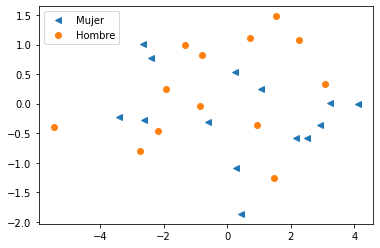

In [138]:
plt.plot(new_df[new_df.Sexo==0].Z1, new_df[new_df.Sexo==0].Z2, '<', label='Mujer')
plt.plot(new_df[new_df.Sexo==1].Z1, new_df[new_df.Sexo==1].Z2, 'o', label='Hombre')
plt.legend(loc='upper left')
plt.show()